[Previous](https://codelabs.developers.google.com/codelabs/tensorflow-lab1-helloworld/#3)
|[Next](https://codelabs.developers.google.com/codelabs/tensorflow-lab3-convolutions/index.html?index=..%2F..index#0)
## 1. Introduction

In the previous codelab, you saw how to create a neural network that figured out the problem you were trying to solve—an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill. It would have been easier to write the function Y=3x+1 directly, instead of bothering with machine learning to learn the relationship between X and Y for a fixed set of values, and then extending that for all values.

But what about a scenario where writing rules like that are much more difficult, for example, a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing ten different types.


## 2. Before you begin...

You'll be using TensorFlow to build the neural network for computer vision.

If you've never done this before, I'd strongly recommend you use Google Colaboratory, a browser-based environment that contains all the required dependencies, including TensorFlow and the required libraries. You can find the code for the rest of this lab running [here in a Colab]().

Otherwise, the main language you will use for training models is Python, so you will need to have that installed. In addition to that, you'll also need TensorFlow. Details on installation are on [tensorflow.org](). You'll also need the NumPy library.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


Labels
Each training and test example is assigned to one of the following labels:

|Label|	Description|
|-----|------------|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

The Fashion MNIST data is available directly in the `tf.keras.datasets` API. Load it like this:

In [2]:
mnist = tf.keras.datasets.fashion_mnist
mnist

<module 'tensorflow_core.keras.datasets.fashion_mnist' from 'c:\\users\\reddy\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

Calling load_data on this object gives you two sets of two lists: training values and testing values that represent graphics that show clothing items and their labels.

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
training_images.shape

(60000, 28, 28)

In [5]:
training_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

What do these values look like? Let's print a training image and a training label to see. You can experiment with different indices in the array.

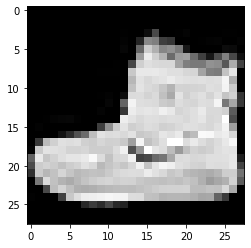

In [8]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(training_images[0])

In [20]:
training_labels[1]

0

In [11]:
test_labels[0]

9

In [12]:
import matplotlib.pyplot as plt

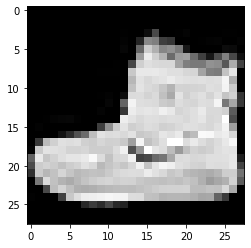

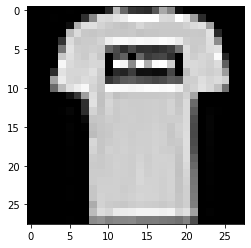

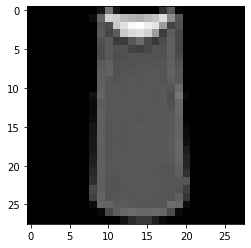

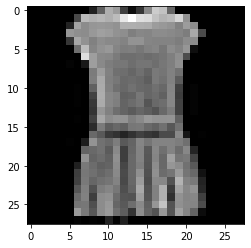

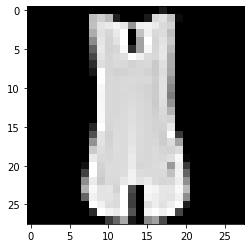

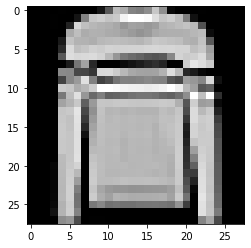

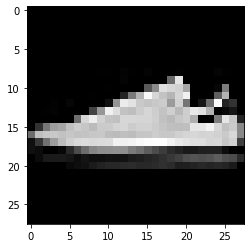

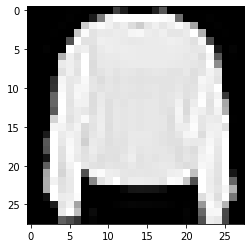

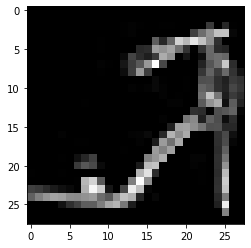

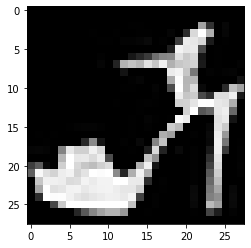

In [13]:
for i in range(10):
    #plt.gray()
    plt.imshow(training_images[i])
    plt.show()

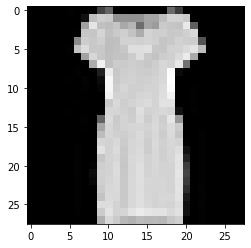

In [14]:
plt.imshow(training_images[20])

In [15]:
print(training_labels[1])

0


In [16]:
print(training_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

You'll notice that all of the values are integers between 0 and 255. When training a neural network, for various reasons it's easier to treat all values as between 0 and 1, a process called normalization. Fortunately, Python provides an easy way to normalize a list like this without looping:

In [17]:
training_images  = training_images / 255.0 # min Max Scaling
training_images[1][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
       0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

You may also want to look at 42, a different boot than the one at index 0.

Now, you might be wondering why there are 2 datasets ... training and testing!

The idea is to have one set of data for training and then another set of data—that the model hasn't yet seen—to see how well it can classify values. After all, when you're done, you'll want to use the model with data that it hadn't previously seen! Also, without separate testing data, you'll run the risk of the network just memorizing its training data without generalizing its knowledge.

In [18]:
test_images = test_images / 255.0
test_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
        0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
        1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
        0.28235294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
        0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
        0.94117647, 0.9019

In [19]:
len(test_images)

10000

You may also want to look at 42, a different boot than the one at index 0.

Now, you might be wondering why there are 2 datasets ... training and testing!

The idea is to have one set of data for training and then another set of data—that the model hasn't yet seen—to see how well it can classify values. After all, when you're done, you'll want to use the model with data that it hadn't previously seen! Also, without separate testing data, you'll run the risk of the network just memorizing its training data without generalizing its knowledge.


## 4. Design the Model

Let's now design the model. If you went through Codelab 1, this will look familiar. But instead of one layer with one neuron, you'll have three layers. Let's go through these one-by-one and explore the different types of layer and the parameters used for each:

In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),                          #input layer
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),  # hidden Layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.sigmoid), # hidden Layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # output Layer

In [22]:
model 

**Sequential:** This defines a SEQUENCE of layers in the neural network.

**Flatten:** Remember earlier, our images were a square when they are printed out. Flatten just takes that square and turns it into a one-dimensional vector.**

**Dense:** Adds a layer of neurons.

Each layer of neurons needs an activation function to tell them what to do. There are lots of options, but use these for now.

1. **Relu** effectively means if X>0 return X, else return 0. It only passes values 0 or greater to the next layer in the network.

2. **Softmax** takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from saving to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].


|Label|	Description|Softmax|
|-----|------------|---|
|0|	T-shirt/top|0.1|
|1|	Trouser|0.1|
|2|	Pullover|0.05|
|3|	Dress|0.1|
|4|	Coat|9.5|
|5|	Sandal|0.1|
|6|	Shirt|0.05|
|7|	Sneaker|0.05|
|8|	Bag|0.05|
|9|	Ankle boot|0.05|

## 5. Compiling and Training the Model

Now that the model is defined, the next thing to do is build it. Create a model by first compiling it with an optimizer and loss function, then train it on your training data and labels. The goal is to have the model figure out the relationship between the training data and its training labels. Later, you want your model to see data that resembles your training data then make a prediction about what that data should look like.

You'll notice we also use the `metrics=` parameter. This allows TensorFlow to report back about how accurate the training is against the test set. It measures how many it got right and wrong, and reports back on how it's doing.

In [23]:
model.compile(optimizer = 'sgd',    #tf.train.AdamOptimizer()
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 131us/sample - loss: 1.2726 - accuracy: 0.6586
Epoch 2/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.7066 - accuracy: 0.7603 - loss: 0.7072 - accuracy: 0.76
Epoch 3/50
60000/60000 [==============================] - 7s 112us/sample - loss: 0.5977 - accuracy: 0.7916
Epoch 4/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.5376 - accuracy: 0.8124
Epoch 5/50
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4990 - accuracy: 0.8259
Epoch 6/50
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4741 - accuracy: 0.8329
Epoch 7/50
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4557 - accuracy: 0.8382
Epoch 8/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.4409 - accuracy: 0.8424
Epoch 9/50
60000/60000 [==============================] - 7s 110us/sample - loss:

When model.fit executes, you'll see both loss and accuracy:


When the model is done training, you will see an accuracy value at the end of the final epoch. It might look something like `0.8926` as above. This tells you that your neural network is about`89%` accurate in classifying the training data. In other words, it figured out a pattern match between the image and the labels that worked 89% of the time. Not great, but not bad considering it was only trained for five epochs and done quickly.

## 6. Test the Model
But how would the model perform on data it hasn't seen? That's why we have the test set. We call model.evaluate and pass in the two sets, and it reports back the loss for each. Let's give it a try:

In [24]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.35025000150203706, 0.8733]

And here's the output:

In this example, that returned an accuracy of .8789, meaning it was about 88% accurate. (You might have slightly different values.)

As expected, the model is not as accurate on the unknown data as it was with the data it was trained on! As you learn more TensorFlow, you'll look at ways to improve this.

To explore further, try the exercises in the next step.

## 7. Exploration Exercises
**Exercise 1:**

For this first exercise, run the code below. It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [26]:
classifications = model.predict(test_images)
print(classifications[0])

[1.1930059e-04 2.4369450e-05 3.5933647e-04 1.3038088e-04 1.5233978e-05
 1.5270963e-02 2.2619138e-04 1.8783309e-02 1.7255702e-03 9.6334535e-01]


In [28]:
print(test_labels[0]==training_labels[0])

True


`Hint:` try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does?

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding label, i.e. the first value in the list is the probability that the clothing is of class '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities except one. Also, because of Softmax, all the probabilities in this list sum to 1.0.

Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the neural network has predicted that the item it is classifying is most likely an ankle boot

**Exercise 2:**

Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

So, for example, if you increase to 1024 neurons you have to do more calculations, slowing down the process. But, in this case, they have a good impact because the model is more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly.

**Exercise 3:**

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an `error` about the shape of the data. The details of the error may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writing all the code to handle that ourselves, we add the Flatten() layer at the beginning. And when the arrays are loaded into the model later, they'll automatically be flattened for us.

**Exercise 5:**

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10?

Answer: There isn't a significant impact -- because this is relatively simple data. For far more complex data, extra layers are often necessary.


**Exercise 6:**
    
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try -- note that I have commented out the two lines that normalize the data.

Why do you think you get different results? There's a great answer [here on Stack Overflow](https://stackoverflow.com/questions/48284427/why-should-we-normalize-data-for-deep-learning-in-keras).

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

## 8. Explore Callbacks

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs? Like any other program, you have callbacks! Let's see them in action:

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

[Previous](https://codelabs.developers.google.com/codelabs/tensorflow-lab1-helloworld/#3)
|[Next](https://codelabs.developers.google.com/codelabs/tensorflow-lab3-convolutions/index.html?index=..%2F..index#0)